# Marine Heatwaves Definition

This document describes the `marineHeatWaves` module for python which implements the Marine Heatwave (MHW) definition of Hobday et al. (*manuscript submitted to Progress in Oceanography*). This software is demonstrated by applying the MHW definition to a stochastic red noise process. This was developed as an interactive ipython notebook which the user can run themselves provided they have the required python modules (`numpy`, `scipy`, `datetime`, and `matplotlib`).

In [2]:
# Load required modules
import numpy as np
from datetime import date, datetime, timedelta
from matplotlib import pyplot as plt
import os 
import xarray as xr
import pandas as pd
from tqdm import tqdm


In [3]:
# Load marineHeatWaves definition module
import marineHeatWaves as mhw

## Marine Heatwave Detection

The marineHeatWaves (`mhw`) module consists of a number of functions for the detection and characterization of MHWs. The main function is the detection function (`detect`) which takes as input a time series of temperature (and a corresponding time vector) and outputs a set of detected MHWs. We first run the MHW detection algorithm which returns the variable `mhws`, consisting of the detected MHWs, and `clim`, consisting of the climatological (varying by day-of-year) seasonal cycle and extremes threshold:


In [4]:
# Change directory to data folder
# data_dir = "/Users/annaolsen/Desktop/Speciale/DS_thesis/data/SST/SST_subset"
data_dir = "/Volumes/PortableSSD/Speciale/SST/SST_daily/SST_subsets"
os.chdir(data_dir)

# Load data as df
# df = pd.read_csv("SST_merged_1981_2013.csv")
df = pd.read_csv("merged_SST_1981_2013.csv")

# Extract unique dates from the 'date' column to list
dates = sorted(df['date'].unique())

# Dates are in string format -> Convert to datetime format
dates = [datetime.strptime(date_str, '%Y-%m-%d').date() for date_str in dates]

# Define the start and end dates
start_date = dates[0]  # first date in dates is the start date
end_date = dates[-1]  # last date in dates is the end date

print(f"{start_date}, {end_date}")

# Create time vector (as ordinal)
t = np.arange((start_date).toordinal(), end_date.toordinal() + 1)

# print(dates)
# print(t)

print(len(dates))
print(len(t))


df['location'] = list(zip(df['lat'], df['lon']))

locations = df['location'].unique()


1981-09-01, 2013-12-31
11810
11810


In [4]:

def create_mhws_dataframe(df, locations_list):

    # Iterate over the list of groups and apply the custom function
    all_dfs = []

    for location in tqdm(locations_list):
        sst_df = df[df['location'] == location]
        sst_df = sst_df.sort_values(by='date')

        sst = list(sst_df['temp'])

        # Convert nested SST values into a one-dimensional array 
        sst = np.array(sst).flatten()
        
        # print(f"sst: {len(sst)}, t: {len(t)}")
        
        # print(sst.min(), sst.mean(), sst.max(), sst.std())
        
        # Use mhw function from marineHeatWaves.py
        mhws, clim = mhw.detect(t, sst)

        # Turn the mhws output into a dataframe
        mhws_df = pd.DataFrame.from_dict(mhws, orient='columns')
        # print(mhws_df.shape)

        # Add an extra column for the location
        mhws_df['location'] = str(location)

        # Append dataframe to list of dataframes
        all_dfs.append(mhws_df)


    # Concatenate all dataframes into one
    result_df = pd.concat(all_dfs, ignore_index=True)

    # Save to csv
    result_df.to_csv('mhws_info_XYZ.csv', index=False)
    

    return result_df
    

df_new = create_mhws_dataframe(df, locations)

print(df_new)


  3%|▎         | 19/555 [00:19<07:47,  1.15it/s]/Users/annaolsen/Desktop/Speciale/DS_thesis/MHW/marineHeatWaves.py:411: RuntimeWarning: invalid value encountered in scalar divide
  mhw['rate_decline'].append((mhw_relSeas[tt_peak] - mhw_relSeas[-1]) / (tt_end-tt_start-tt_peak))
 32%|███▏      | 177/555 [02:40<05:02,  1.25it/s]/Users/annaolsen/Desktop/Speciale/DS_thesis/MHW/marineHeatWaves.py:411: RuntimeWarning: invalid value encountered in scalar divide
  mhw['rate_decline'].append((mhw_relSeas[tt_peak] - mhw_relSeas[-1]) / (tt_end-tt_start-tt_peak))
 52%|█████▏    | 288/555 [04:08<03:27,  1.28it/s]/Users/annaolsen/Desktop/Speciale/DS_thesis/MHW/marineHeatWaves.py:411: RuntimeWarning: invalid value encountered in scalar divide
  mhw['rate_decline'].append((mhw_relSeas[tt_peak] - mhw_relSeas[-1]) / (tt_end-tt_start-tt_peak))
 90%|████████▉ | 497/555 [07:07<00:47,  1.21it/s]/Users/annaolsen/Desktop/Speciale/DS_thesis/MHW/marineHeatWaves.py:411: RuntimeWarning: invalid value encountered i

       time_start  time_end  time_peak  date_start    date_end   date_peak  \
0          723641    723646     723643  1982-04-06  1982-04-11  1982-04-08   
1          723812    723825     723816  1982-09-24  1982-10-07  1982-09-28   
2          723914    723918     723917  1983-01-04  1983-01-08  1983-01-07   
3          724121    724125     724122  1983-07-30  1983-08-03  1983-07-31   
4          724622    724626     724624  1984-12-12  1984-12-16  1984-12-14   
...           ...       ...        ...         ...         ...         ...   
34892      734770    734839     734801  2012-09-24  2012-12-02  2012-10-25   
34893      734971    734980     734976  2013-04-13  2013-04-22  2013-04-18   
34894      735075    735079     735076  2013-07-26  2013-07-30  2013-07-27   
34895      735161    735167     735162  2013-10-20  2013-10-26  2013-10-21   
34896      735171    735177     735172  2013-10-30  2013-11-05  2013-10-31   

       index_start  index_end  index_peak  duration  ...  \
0  

In [5]:
# df_new = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/SST/SST_subset/mhws_info.csv")
df_new = pd.read_csv("/Users/annaolsen/Desktop/mhws_info_XYZ.csv")

print(df_new['location'].value_counts())

mhws_locations = df_new['location'].unique()

# Convert list1_strings to actual tuples
mhws_locations = [eval(string) for string in mhws_locations]

no_mhws_locations = set(locations) - set(mhws_locations)

no_mhws_locations = sorted(list(no_mhws_locations))
print(no_mhws_locations)


location
(-40.875, -51.625)    91
(79.625, 60.875)      88
(74.375, -85.625)     87
(73.875, -81.625)     85
(74.375, -85.875)     85
                      ..
(-5.125, -85.375)     33
(-10.625, -92.875)    33
(-10.875, -93.625)    32
(-5.375, -85.125)     30
(-5.375, -85.375)     29
Name: count, Length: 555, dtype: int64
[]


In [6]:
print(no_mhws_locations)

[]


In [7]:
print(df_new['location'].value_counts())

mhws_locations = df_new['location'].unique()

# Convert list1_strings to actual tuples
mhws_locations = [eval(string) for string in mhws_locations]


# print(mhws_locations)
# locations = set(locations)
# print(len)
no_mhw_locations = set(locations) - set(mhws_locations)
# print(len(mhws_locations))

# print(type(locations))
print(type(no_mhw_locations))
print(no_mhw_locations)

# Initialize lists to store latitude and longitude
latitudes = []
longitudes = []

# Iterate over the set of tuples and extract latitude and longitude
for location in no_mhw_locations:
    latitudes.append(location[0])
    longitudes.append(location[1])

# Create DataFrame
df_nope = pd.DataFrame({'Latitude': latitudes, 'Longitude': longitudes})

print(df_nope)

location
(-40.875, -51.625)    91
(79.625, 60.875)      88
(74.375, -85.625)     87
(73.875, -81.625)     85
(74.375, -85.875)     85
                      ..
(-5.125, -85.375)     33
(-10.625, -92.875)    33
(-10.875, -93.625)    32
(-5.375, -85.125)     30
(-5.375, -85.375)     29
Name: count, Length: 555, dtype: int64
<class 'set'>
set()
Empty DataFrame
Columns: [Latitude, Longitude]
Index: []


     Latitude  Longitude
0      39.875     12.875
1      39.875     13.875
2      37.375     15.375
3      40.125     13.875
4      35.875     14.375
..        ...        ...
550    36.625     -6.625
551    36.625    -10.375
552    39.125    -10.875
553    44.375     -9.875
554    34.625     14.875

[555 rows x 2 columns]


/var/folders/dg/_lhx53rd0n9583q5gqs1fcg80000gn/T/ipykernel_17417/3299206983.py:24: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


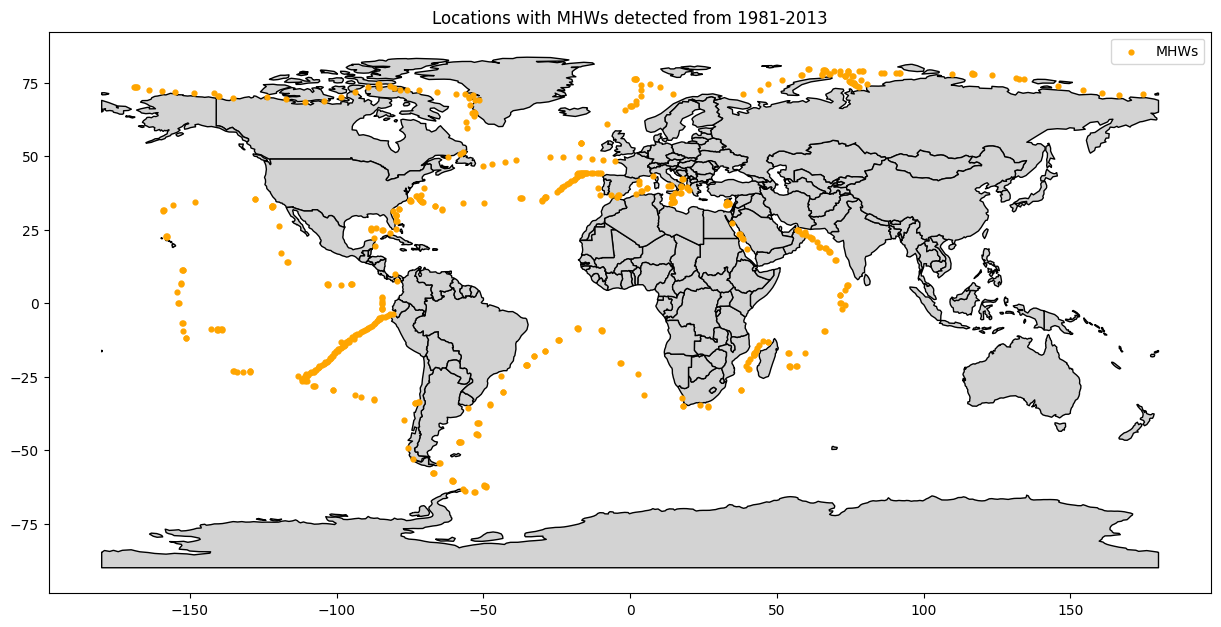

In [8]:


# Initialize lists to store latitude and longitude
latitudes = []
longitudes = []

# Iterate over the set of tuples and extract latitude and longitude
for location in mhws_locations:
    latitudes.append(location[0])
    longitudes.append(location[1])

# Create DataFrame
df_yes = pd.DataFrame({'Latitude': latitudes, 'Longitude': longitudes})

print(df_yes)

import geopandas as gpd
import numpy as np
import xarray as xr
import pandas as pd
import os
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(15, 15))

# Plot world map
world.plot(ax=ax, color='lightgray', edgecolor='black')



# Plot original points
ax.scatter(df_yes['Longitude'], df_yes['Latitude'],
           color='orange', label='MHWs', s=12)



# Plot closest match points
# ax.scatter(depth_df['Longitude'], depth_df['Latitude'],
#            color='darkorange', label='Depth', s=12)

# Set title
ax.set_title('Locations with MHWs detected from 1981-2013')
# Add legend
ax.legend()

plt.show()


691150 691150


/var/folders/dg/_lhx53rd0n9583q5gqs1fcg80000gn/T/ipykernel_17417/717226089.py:17: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


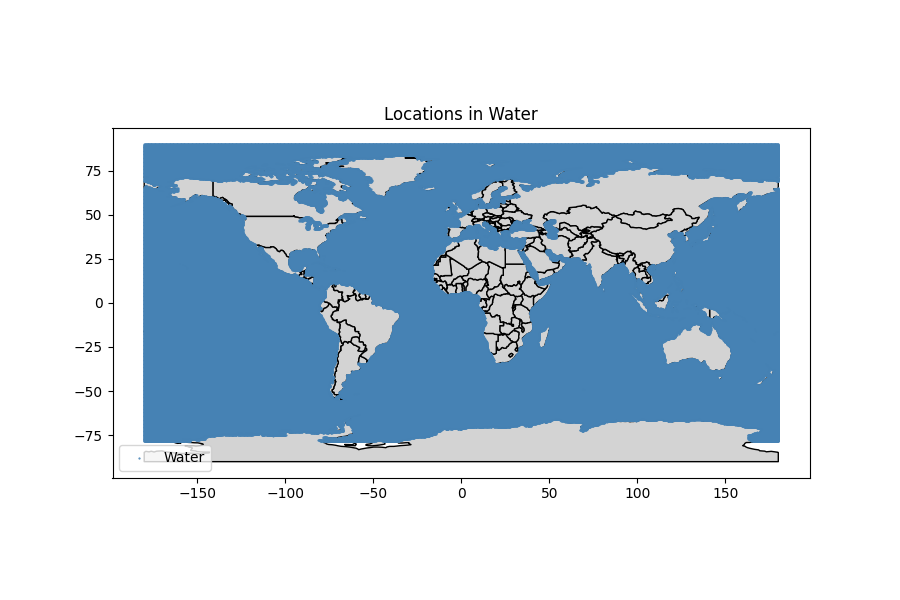

In [9]:
import geopandas as gpd
import numpy as np
import xarray as xr
import pandas as pd
import os
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
%matplotlib widget


# df_loc = pd.read_csv("/Volumes/PortableSSD/Speciale/SST/SST_daily/land_locations.csv")
df_wat = pd.read_csv("/Volumes/PortableSSD/Speciale/SST/SST_daily/water_locations.csv")
# df_wat2 = pd.read_csv("/Volumes/PortableSSD/Speciale/SST/SST_daily/water_locations_threshold.csv")

# print(len(df_wat), len(df_wat2))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(9, 6))

# Plot world map
world.plot(ax=ax, color='lightgray', edgecolor='black')


# Plot points on land
# ax.scatter(df_loc['Longitude'], df_loc['Latitude'],
#            color='darkorange', label='Land', s=0.3)


# Plot points in water
ax.scatter(df_wat['Longitude'], df_wat['Latitude'],
           color='steelblue', label='Water', s=0.3)


# # Plot original points
# ax.scatter(df_nope['Longitude'], df_nope['Latitude'],
#            color='crimson', label='No MHWs', s=6, alpha=0.6)

# Set title
ax.set_title('Locations in Water')
# Add legend
ax.legend()

plt.show()

In [ ]:
mhws, clim = mhw.detect(t, sst)

This algorithm has detected the following number of MHW events:

In [8]:
mhws['n_events']

15

The first ten events, for example, have the following maximum intensities (in $^\circ$C):

In [9]:
mhws['intensity_max'][0:10]

[1.5498954711421842,
 2.4093676382495506,
 2.724232596735801,
 3.7864226679648123,
 4.151818552324849,
 3.8097918725782822,
 2.669527238415135,
 3.830851585634292,
 2.506682934299592,
 3.15288975930983]

Let's have a look at some properties of the event with the largest maximum intensity

In [10]:
ev = np.argmax(mhws['intensity_max'])  # Find largest event
print('Maximum intensity:', mhws['intensity_max'][ev], 'deg. C')
print('Average intensity:', mhws['intensity_mean'][ev], 'deg. C')
print('Cumulative intensity:', mhws['intensity_cumulative'][ev], 'deg. C-days')
print('Duration:', mhws['duration'][ev], 'days')
print('Start date:', mhws['date_start'][ev].strftime("%d %B %Y"))
print('End date:', mhws['date_end'][ev].strftime("%d %B %Y"))

Maximum intensity: 4.151818552324849 deg. C
Average intensity: 2.95711850607267 deg. C
Cumulative intensity: 35.48542207287204 deg. C-days
Duration: 12 days
Start date: 06 August 2008
End date: 17 August 2008


and a closer look at the identified MHW event:

<class 'numpy.datetime64'>


(14826.0, 15126.0)

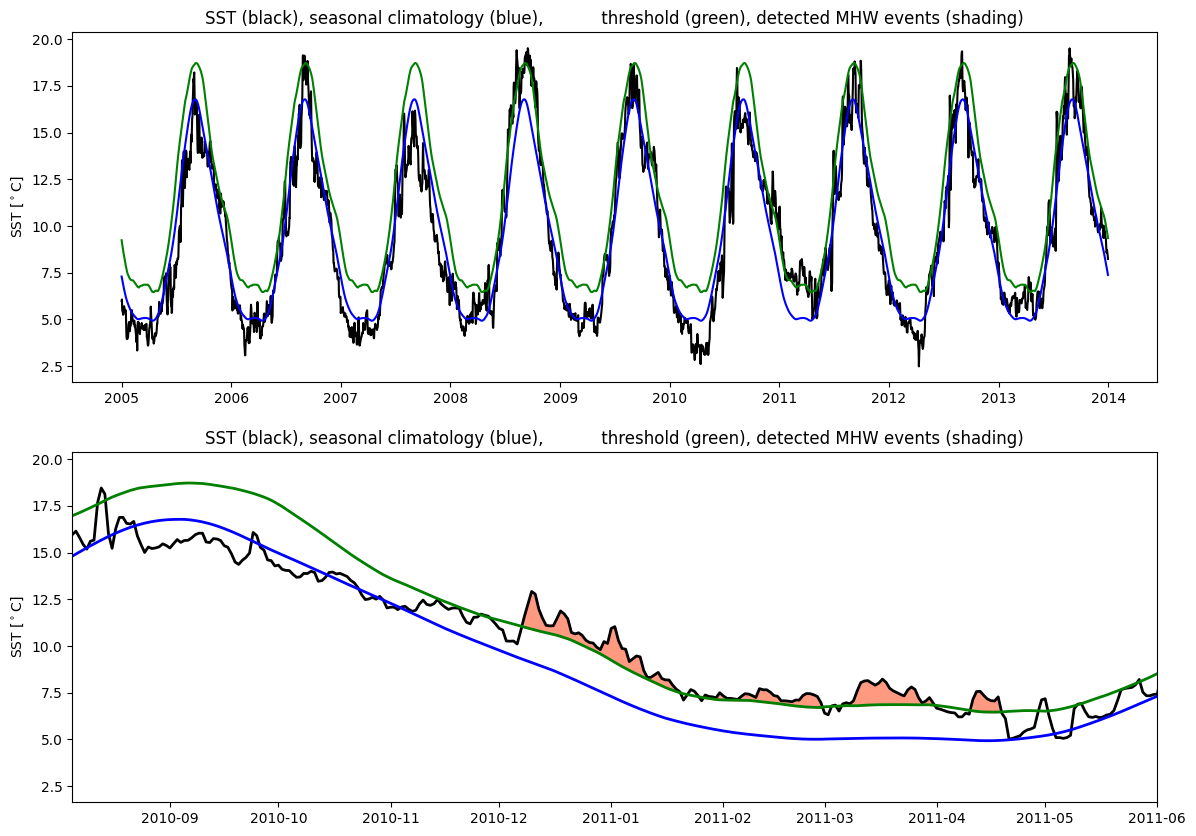

In [49]:
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)

# Plot SST, seasonal cycle, and threshold
plt.plot(dates, sst, 'k-')
plt.plot(dates, clim['thresh'], 'g-')
plt.plot(dates, clim['seas'], 'b-')
plt.title('SST (black), seasonal climatology (blue), \
          threshold (green), detected MHW events (shading)')
# plt.xlim(t[0], t[-1])
# plt.ylim(sst.min()-0.5, sst.max()+0.5)
plt.ylabel(r'SST [$^\circ$C]')
plt.subplot(2,1,2)

# Find indices for all ten MHWs before and after event of interest and shade accordingly
for ev0 in np.arange(ev-10, ev+11, 1):
    t1 = np.where(t==mhws['time_start'][ev0])[0][0]
    t2 = np.where(t==mhws['time_end'][ev0])[0][0]
    plt.fill_between(dates[t1:t2+1], sst[t1:t2+1], clim['thresh'][t1:t2+1], \
                     color=(1,0.6,0.5))

# Find indices for MHW of interest and shade accordingly
t1 = np.where(t==mhws['time_start'][ev])[0][0]
t2 = np.where(t==mhws['time_end'][ev])[0][0]
plt.fill_between(dates[t1:t2+1], sst[t1:t2+1], clim['thresh'][t1:t2+1], \
                 color='r')

# Plot SST, seasonal cycle, threshold, shade MHWs with main event in red
plt.plot(dates, sst, 'k-', linewidth=2)
plt.plot(dates, clim['thresh'], 'g-', linewidth=2)
plt.plot(dates, clim['seas'], 'b-', linewidth=2)
plt.title('SST (black), seasonal climatology (blue), \
          threshold (green), detected MHW events (shading)')
# plt.xlim(mhws['time_start'][ev]-150, mhws['time_end'][ev]+150)
# plt.xlim(dates[]-150, dates[ev]+150)

# plt.ylim(clim['seas'].min() - 1, clim['seas'].max() + mhws['intensity_max'][ev] + 0.5)
plt.ylabel(r'SST [$^\circ$C]')
print(type(dates[0]))

stop_date = np.datetime64(datetime(2011,6,1))
start_date = stop_date - np.timedelta64(300, 'D')
plt.xlim(start_date, stop_date)

Yep, It's certainly picked out the largest event in the series (dark red shading). This event also seems to have been preceded and succeeded by a number of shorter, weaker events (light red shading). Let's have a look at how the MHW statistics are distributed across all the detected events:

Text(0.5, 0, 'MHW event number')

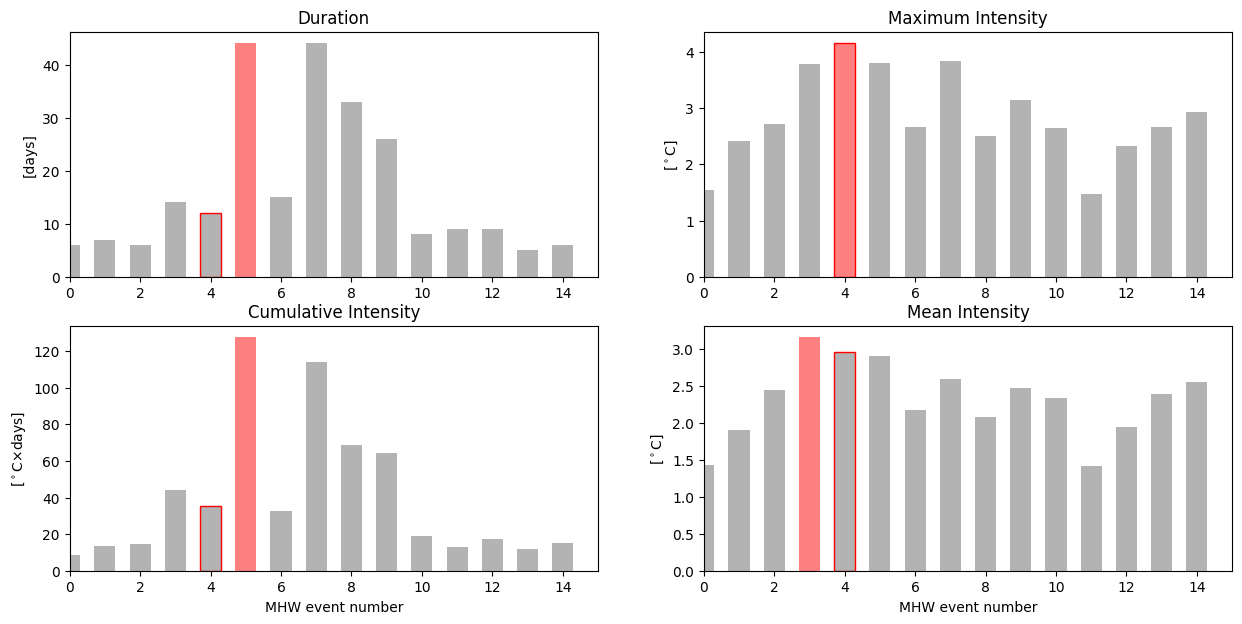

In [12]:
plt.figure(figsize=(15,7))
# Duration
plt.subplot(2,2,1)
evMax = np.argmax(mhws['duration'])
plt.bar(range(mhws['n_events']), mhws['duration'], width=0.6, \
        color=(0.7,0.7,0.7))
plt.bar(evMax, mhws['duration'][evMax], width=0.6, color=(1,0.5,0.5))
plt.bar(ev, mhws['duration'][ev], width=0.6, edgecolor=(1,0.,0.), \
        color='none')
plt.xlim(0, mhws['n_events'])
plt.ylabel('[days]')
plt.title('Duration')
# Maximum intensity
plt.subplot(2,2,2)
evMax = np.argmax(mhws['intensity_max'])
plt.bar(range(mhws['n_events']), mhws['intensity_max'], width=0.6, \
        color=(0.7,0.7,0.7))
plt.bar(evMax, mhws['intensity_max'][evMax], width=0.6, color=(1,0.5,0.5))
plt.bar(ev, mhws['intensity_max'][ev], width=0.6, edgecolor=(1,0.,0.), \
        color='none')
plt.xlim(0, mhws['n_events'])
plt.ylabel(r'[$^\circ$C]')
plt.title('Maximum Intensity')
# Mean intensity
plt.subplot(2,2,4)
evMax = np.argmax(mhws['intensity_mean'])
plt.bar(range(mhws['n_events']), mhws['intensity_mean'], width=0.6, \
        color=(0.7,0.7,0.7))
plt.bar(evMax, mhws['intensity_mean'][evMax], width=0.6, color=(1,0.5,0.5))
plt.bar(ev, mhws['intensity_mean'][ev], width=0.6, edgecolor=(1,0.,0.), \
        color='none')
plt.xlim(0, mhws['n_events'])
plt.title('Mean Intensity')
plt.ylabel(r'[$^\circ$C]')
plt.xlabel('MHW event number')
# Cumulative intensity
plt.subplot(2,2,3)
evMax = np.argmax(mhws['intensity_cumulative'])
plt.bar(range(mhws['n_events']), mhws['intensity_cumulative'], width=0.6, \
        color=(0.7,0.7,0.7))
plt.bar(evMax, mhws['intensity_cumulative'][evMax], width=0.6, color=(1,0.5,0.5))
plt.bar(ev, mhws['intensity_cumulative'][ev], width=0.6, edgecolor=(1,0.,0.), \
        color='none')
plt.xlim(0, mhws['n_events'])
plt.title(r'Cumulative Intensity')
plt.ylabel(r'[$^\circ$C$\times$days]')
plt.xlabel('MHW event number')

The red shaded bars show the largest event on record by duration, maximum intensity, cumulative intensity, and mean intensity, while the red-outlined bars show the specific event chosen above (which happens to be largest by maximum intensity). We can see how this event ranks according to the other metrics as follows:

In [13]:
rank, returnPeriod = mhw.rank(t, mhws)
print("The 2012 NWA event is ranked number " \
        + str(rank['duration'][ev]) + " by duration")
print("The 2012 NWA event is ranked number " \
        + str(rank['intensity_max'][ev]) + " by maximum intensity")
print("The 2012 NWA event is ranked number " \
        + str(rank['intensity_mean'][ev]) + " by mean intensity")
print("The 2012 NWA event is ranked number " \
        + str(rank['intensity_cumulative'][ev]) + " by cumulative intensity")

The 2012 NWA event is ranked number 7 by duration
The 2012 NWA event is ranked number 1 by maximum intensity
The 2012 NWA event is ranked number 2 by mean intensity
The 2012 NWA event is ranked number 6 by cumulative intensity


We can even look at the return periods for events with those properties:

In [14]:
print("The return period for an event with this duration was " \
        + str(returnPeriod['duration'][ev]) + " years")
print("The return period for an event with this maximum intensity was " \
        + str(returnPeriod['intensity_max'][ev]) + " years")
print("The return period for an event with this mean intensity was " \
        + str(returnPeriod['intensity_mean'][ev]) + " years")
print("The return period for an event with this cumulative intensity was " \
        + str(returnPeriod['intensity_cumulative'][ev]) + " years")

The return period for an event with this duration was 1.4284736481861737 years
The return period for an event with this maximum intensity was 9.999315537303216 years
The return period for an event with this mean intensity was 4.999657768651608 years
The return period for an event with this cumulative intensity was 1.666552589550536 years


## Block-averaged Marine Heatwave properties

The marineHeatWaves (`mhw`) module also consists of functions to calculate the average of MHW properties over blocks in time (e.g., annually, decadally). The block-averaging function (`blockAverage`) takes as input a set of detected MHWs (i.e., the output from `detect`, the detection function described above) and outputs the MHW properties averaged over the specified block-length. This output can then be passed through the `meanTrend` function in order to calculate the time-mean and linear trend of the MHW properties over the measurement period.

Let's start by applying the block-averaging function to the Mediterranean MHWs which are stored in the variable `mhws`, using the default block length of 1 year (i.e., annual averages):

In [15]:
mhwBlock = mhw.blockAverage(t, mhws)

The variable `mhwBlock` has a set of keys which are time series of the MHW properties over the blocks. The central year of the blocks are stored in the key `years_centre` so we can look at, as an example, time series of MHW counts in each year and the average maximum intensity in each year:


Text(0.5, 1.0, 'Average MHW maximum intensity by year')

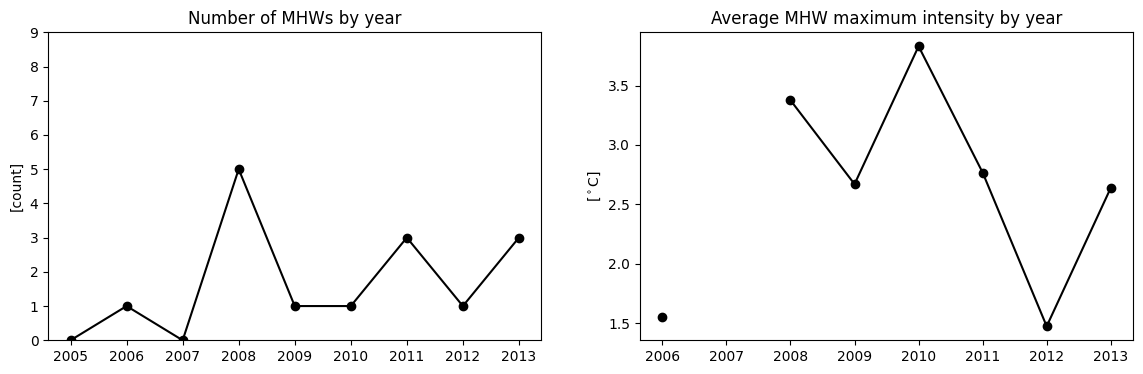

In [16]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(mhwBlock['years_centre'], mhwBlock['count'], 'k-o')
plt.ylim(0,9)
plt.ylabel('[count]')
plt.title('Number of MHWs by year')
plt.subplot(1,2,2)
plt.plot(mhwBlock['years_centre'], mhwBlock['intensity_max'], 'k-o')
plt.ylabel(r'[$^\circ$C]')
plt.title('Average MHW maximum intensity by year')

We can calculate the mean and trend of the MHW properties using the `meanTrend` function:

In [17]:
mean, trend, dtrend = mhw.meanTrend(mhwBlock)
print("There are on average " + str(mean['count']) + " MHWs in each year, \n \
with a linear trend of " + str(10*trend['count']) + " MHW events per decade \n \
This trend is statistically significant (p<0.05): " \
+ str(np.abs(trend['count']) > dtrend['count']) + "\n")

print("The average maximum intensity is " + str(mean['intensity_max']) + " deg. C, \n \
with a linear trend of " + str(10*trend['intensity_max']) + " deg. C per decade \n \
This trend is statistically significant (p<0.05): " \
+ str(np.abs(trend['intensity_max']) > dtrend['intensity_max']))

There are on average 1.6666666666666665 MHWs in each year, 
 with a linear trend of 2.3333333333333344 MHW events per decade 
 This trend is statistically significant (p<0.05): False

The average maximum intensity is 2.5996025579937685 deg. C, 
 with a linear trend of 0.17710427050234792 deg. C per decade 
 This trend is statistically significant (p<0.05): False
